In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib  
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = data = np.random.randn(100000)

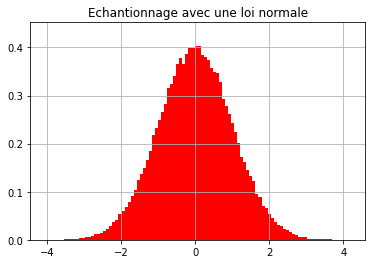

In [3]:
hx, hy, _ = plt.hist(data, bins=100, density=1,color="red")
plt.ylim(0.0,max(hx)+0.05)
plt.title('Echantionnage avec une loi normale')
plt.grid()

# CONFIDENCE INTERVAL

In [4]:
import scipy.stats
# CREATE DATAFRAME OF ONE COLUMN SAMPLE VALUES DIMENSIONED AS WANTED
def Echantion(n):
    return pd.DataFrame({'Valeur': np.random.randn(n)})

# YIELD DOMAINS [min; max] in which (1-alpha) percent of values will fall in 
def quantiles(n=1000, alpha=0.05):
    dist = Echantion(n)
    valmin=dist.Valeur.quantile(alpha/2)
    valmax=dist.Valeur.quantile(1-(alpha/2))                     
    print('Confidence interval containing {}% of values : ({},{})'.format((1-alpha)*100, valmin,valmax))
    
    return dist.Valeur.quantile(alpha/2), dist.Valeur.quantile(1-(alpha/2))

In [5]:
quantiles(n=1000, alpha=0.05)
quantiles(n=1000, alpha=0.1)
quantiles(n=1000, alpha=0.30)

Confidence interval containing 95.0% of values : (-1.8540228221457309,1.9703937923141468)
Confidence interval containing 90.0% of values : (-1.7524538607962643,1.6368270160811942)
Confidence interval containing 70.0% of values : (-1.0221249436367883,1.0212302232632178)


(-1.0221249436367883, 1.0212302232632178)

In [6]:
# GET CONFIDENCE INTERNAL 
print('value for which 99% of sample value are inferior :')
scipy.stats.scoreatpercentile(data,99)

value for which 99% of sample value are inferior :


2.333537822010841

# MEAN ESTIMATION

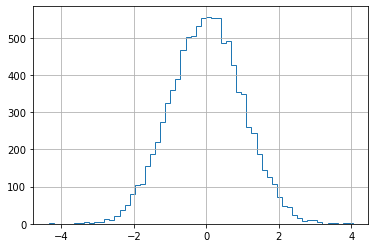

In [7]:
sample1 = Echantion(10000)
sample1.Valeur.hist(histtype='step', bins=60)

In [8]:
np.mean(sample1.Valeur)

-0.0008006274180855671

In [9]:
# can DEFINE A CONFIDENCE INTERVAL OF MEAN USING QUANTILES
# REAL POPULATION MEAN has x % probabilities to be in quantile domain 
quantiles(n=1000, alpha=0.1)

Confidence interval containing 90.0% of values : (-1.6147278435323966,1.6509009055010042)


(-1.6147278435323966, 1.6509009055010042)

# HYPOTHESE TESTING

In [10]:
from scipy.stats import ttest_1samp as ttest1

def Echantion_uni(n): # UNIFORM FUNCTION
    return pd.DataFrame({'Valeur': np.random.rand(n)})

global mean : 0.4999482541286725


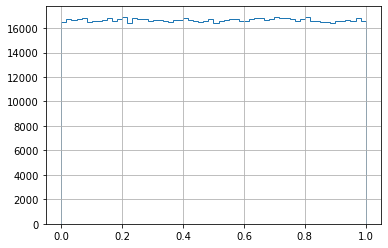

In [11]:
# GENERATING A RANDOM POPULATION
# population is normally not know (here will be used to verify our hypotheses)
np.random.seed(1)
population = Echantion_uni(1000000)
population.Valeur.hist(histtype='step',bins=60)
print ('global mean : {}'.format(np.mean(population.Valeur)))

In [12]:
# CREATE A RANDOM SAMPLE FROM POPULATION
sample1 = np.random.choice(population.Valeur, 100)
sample2 = np.random.choice(population.loc[(population["Valeur"]>0.3)].Valeur,100)

In [13]:
# TEST OF SAMPLE COMPARE TO POPLATION
# H0 = sample MEAN = population mean
s,p_value = ttest1(sample1, population.Valeur.mean())

# H0 is considered OK if PVALUE > Reject_criteria = 5% , 1% , 0.025%
if p_value > 0.05 : print('Hypothese accepted ! Pvalue : ')
else : print('Hypothese rejected ! Pvalue : ')
print(p_value)
print('sample mean : {} // population mean : {}'.format(np.mean(sample1),np.mean(population.Valeur)))

Hypothese accepted ! Pvalue : 
0.06927492027996687
sample mean : 0.4489592682466618 // population mean : 0.4999482541286725


In [14]:
s,p_value = ttest1(sample2, population.Valeur.mean())

# H0 is considered OK if PVALUE > Reject_criteria = 5% , 1% , 0.025%
if p_value > 0.05 : print('Hypothese accepted ! Pvalue : ')
else : print('Hypothese rejected ! Pvalue : ')
print(p_value)
print('sample mean : {} // population mean : {}'.format(np.mean(sample2),np.mean(population.Valeur)))

Hypothese rejected ! Pvalue : 
1.4521385475066927e-10
sample mean : 0.6475556989639624 // population mean : 0.4999482541286725
